# Plotting It
**The Answers are In The Plots**

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tqdm.auto import tqdm
from mapper import D, CODE_DICT

## Setup

### Setting Up Plots

[`seaborn.color_palette`](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)

In [2]:
def swp(temp, i,j): 
    temp[i], temp[j] = temp[j], temp[i]

In [3]:
bg_pal = sns.color_palette(palette="Greys", n_colors=7, desat=1); bg_pal

[(0.9408227604767397, 0.9408227604767397, 0.9408227604767397),
 (0.8501191849288735, 0.8501191849288735, 0.8501191849288735),
 (0.7393771626297578, 0.7393771626297578, 0.7393771626297578),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.44844290657439445, 0.44844290657439445, 0.44844290657439445),
 (0.3174163783160323, 0.3174163783160323, 0.3174163783160323),
 (0.14111495578623606, 0.14111495578623606, 0.14111495578623606)]

In [4]:
fg_pal = sns.cubehelix_palette(n_colors=7, reverse=True, start=0.4, rot=-0.3, gamma=1, hue=0.8, light=0.90, dark=0.2); fg_pal

[[0.2422125141572054, 0.15744979073635085, 0.31309987585579185],
 [0.3417202904333683, 0.2744221852385428, 0.4838364914370627],
 [0.42110548464989916, 0.40051357238425794, 0.6248909855073913],
 [0.5000073149776993, 0.5382166336741867, 0.7406333587462666],
 [0.5901440110545323, 0.6757067349934737, 0.8268773666845682],
 [0.7041482841622206, 0.8051210261326194, 0.8913437968399351],
 [0.8506539764033358, 0.9195839220343646, 0.9473641061002908]]

In [5]:
fg_pal = sns.color_palette(palette="Set2", n_colors=7, desat=0.9); 
swp(fg_pal, 0, 2); swp(fg_pal, 1, 3)
fg_pal

[(0.5650980392156864, 0.6321568627450981, 0.783921568627451),
 (0.8876470588235295, 0.5594117647058823, 0.7605882352941177),
 (0.41803921568627445, 0.7427450980392156, 0.6403921568627451),
 (0.9580392156862746, 0.5662745098039216, 0.41450980392156855),
 (0.644705882352941, 0.8211764705882353, 0.35529411764705887),
 (0.9592156862745098, 0.8250980392156863, 0.22509803921568627),
 (0.8821568627450982, 0.765686274509804, 0.5962745098039215)]

In [6]:
titanic = sns.load_dataset('titanic')
def test_plot(figsize=(20,12), save=False):
    n = np.random.randn(10000, 6)
    for i in range(1, 6):
        n[:, i] = n[:, i] * (1 + 0.5 * i) - 2 * i

    fig = plt.figure(figsize=figsize)
    plt.subplot(2,2,1)
    sns.kdeplot(data=n, fill=True, alpha=0.7, linewidth=0).set_title("Test KDE")

    plt.subplot(2,2,2)
    sns.histplot(data=n, bins=100, linewidth=0.2).set_title("Test Hist")


    plt.subplot(2,2,3)
    plt.xlabel("temp x")
    plt.ylabel("temp y")
    x = np.linspace(-np.pi, np.pi, 1000)
    sns.lineplot(data=[np.sin(x * i)for i in range(1,6)]).set_title("Test Line")


    plt.subplot(2,2,4)
    sns.countplot(data=titanic, y='class', hue='embark_town', alpha=0.9).set_title("Test Count")

    sns.despine(top=True, right=True, left=False, bottom=False)

    plt.show()
    if save: fig.savefig("/Users/alan/Desktop/temp.png")

- [`seaborn.set_theme`](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
- [`matplotlib_configuration`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html)

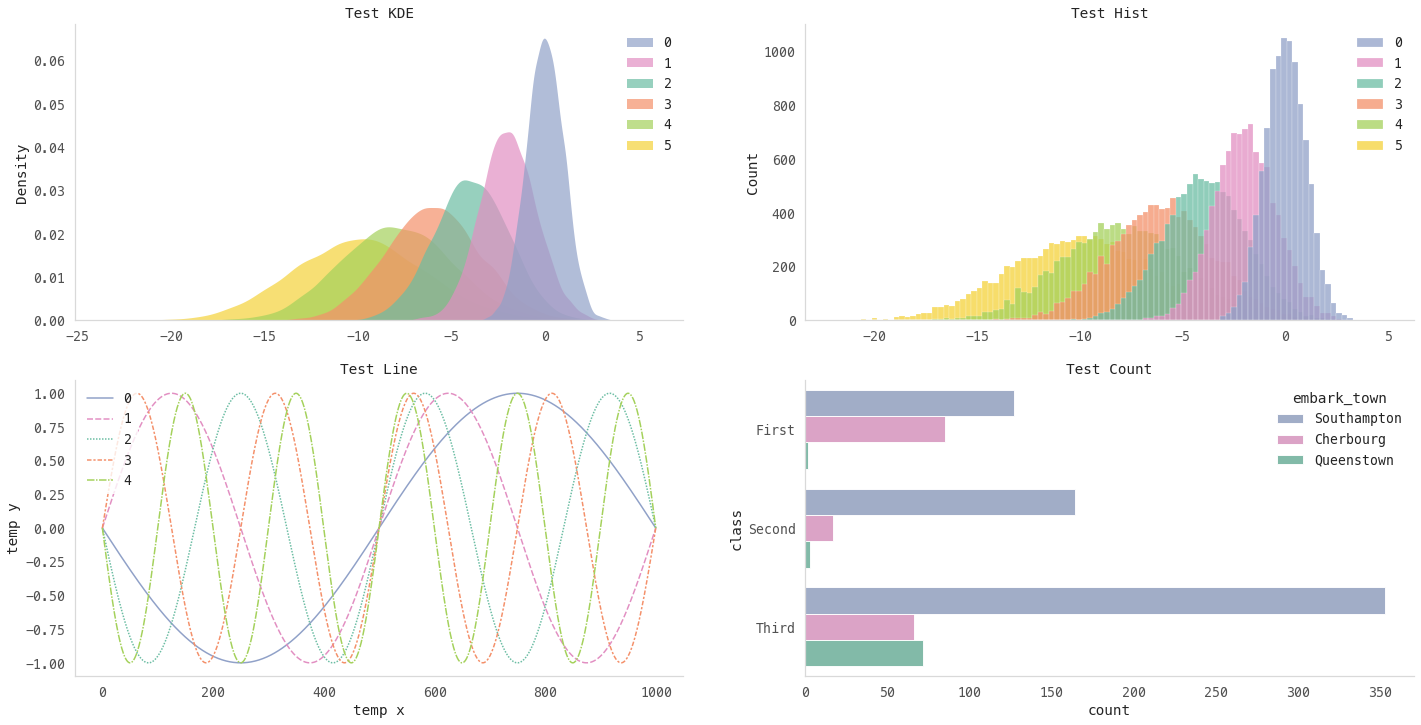

In [7]:
white = (1, 1, 1)
# bg = np.array([234, 233, 240]) / 255; bg = [*bg]
bg = np.array([241, 240, 245]) / 255; bg = [*bg]

sns.reset_orig()
sns.set_theme(
    font=['Menlo', 'sans-serif'],
    font_scale=1.2,
    palette=fg_pal,
    rc={
        'grid.color': white,
        'axes.facecolor': white,
        'axes.edgecolor': bg_pal[1],
        'axes.titlecolor': bg_pal[-1],
        'axes.labelcolor': bg_pal[-1],
        
        'text.color': bg_pal[-1],
        'legend.edgecolor': white,
        'legend.facecolor': white,
        
        'xtick.color': bg_pal[-2],
        'ytick.color': bg_pal[-2],
    }
)
test_plot((24,12))

### Post Plot Setup
**Data Helpers**

In [8]:
years = ("y19", "y20")
non_eng = ('bcom_fm', 'bed', 'bcom_af', 'mms', 'llb', 'bpharm', 'ba', 'bcom_bi')
eng = ('comp', 'chem', 'electronics', 'civil', 'electrical', 'mech', 'it', 'extc')

In [9]:
def get_branch_dict():
    BR = {}
    for y in years:
        for k, i in CODE_DICT.items():
            BR[(y,i)] = k
    BR[('y19', 'mech')] = '1T01417'
    BR[('y20', 'mech')] = '1T01427'
    return BR

def get_concatted_df(d):
    dfs = []
    for y in years:
        for c in eng + non_eng:
            df = getattr(getattr(d, y), c).df.copy()
            for col in ['percent', 'gpa']:
                if col in df: continue
                df[col] = np.nan
            df = df[['name', 'is_female', 'center', 'gpa', 'percent']]
            df['year'] = y
            df['course'] = c
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def get_dc(y, c):
    return getattr(getattr(d, y), c)

def get_row_meta(row):
    dc = get_dc(row['year'], row['course'])
    meta = dc.meta.copy()
    center = dc.center[str(row['center'])]
    meta.update(dict(center=center))
    if '2019' in meta:
        meta.update(dict(date='2019'))
    elif '2020' in meta:
        meta.update(dict(date='2020'))
    else:
        raise Exception('wtf?')
    return meta

In [10]:
# Helpers to impute GPA for LLB
def gg(m):
    try:
        m = float(m)
    except:
        return 0
    if m >= 80: return 10
    if m >= 75: return 9
    if m >= 70: return 8
    if m >= 60: return 7
    if m >= 50: return 6
    if m >= 45: return 5
    if m >= 40: return 4
    return 0

def apply_gpa(d):
    gs = [gg(d[f"{i}_100"]) for i in range(1,5)]
    gs = [g for g in gs if g > 0]
    if len(gs) < 4:
        d['gpa'] = 0.0
    else:
        d['gpa'] = sum(gs) / 4
    return d

In [11]:
d = D()

cleaning and loading data...


done


In [12]:
d.y19.llb.df = d.y19.llb.df.apply(apply_gpa, axis=1)
d.y20.llb.df = d.y20.llb.df.apply(apply_gpa, axis=1)

In [13]:
br = get_branch_dict()
df = get_concatted_df(d)

In [14]:
center_names_eng = {}
for b in eng:
    for k,n in getattr(getattr(d, 'y20'),b).center.items():
        if n == 'P RPV':
            # messup in the conversions
            continue
        center_names_eng[int(k)] = n
        
center_names_neng = {}
for b in non_eng:
    for k,n in getattr(getattr(d, 'y20'),b).center.items():
        if n == 'P RPV':
            # messup in the conversions
            continue
        center_names_neng[int(k)] = n

In [15]:
df['is_eng'] = [int(c in eng) for c in df['course'].tolist()]

## The Main Stuff
**Mumbai University, Everyone Copied Plots**

In [16]:
df_gpa = df[['name', 'is_female', 'center', 'gpa', 'year', 'course', 'is_eng']].dropna()
df_per = df[['name', 'is_female', 'center', 'percent', 'year', 'course', 'is_eng']].dropna()

dfg = df_gpa[df_gpa['gpa'] > 0]
dfp = df_per[df_per['percent'] > 0]
# percentages in B.A are incorrect cause of the tota
dfp = dfp[dfp['course']!='ba']

### Dist: Compare All

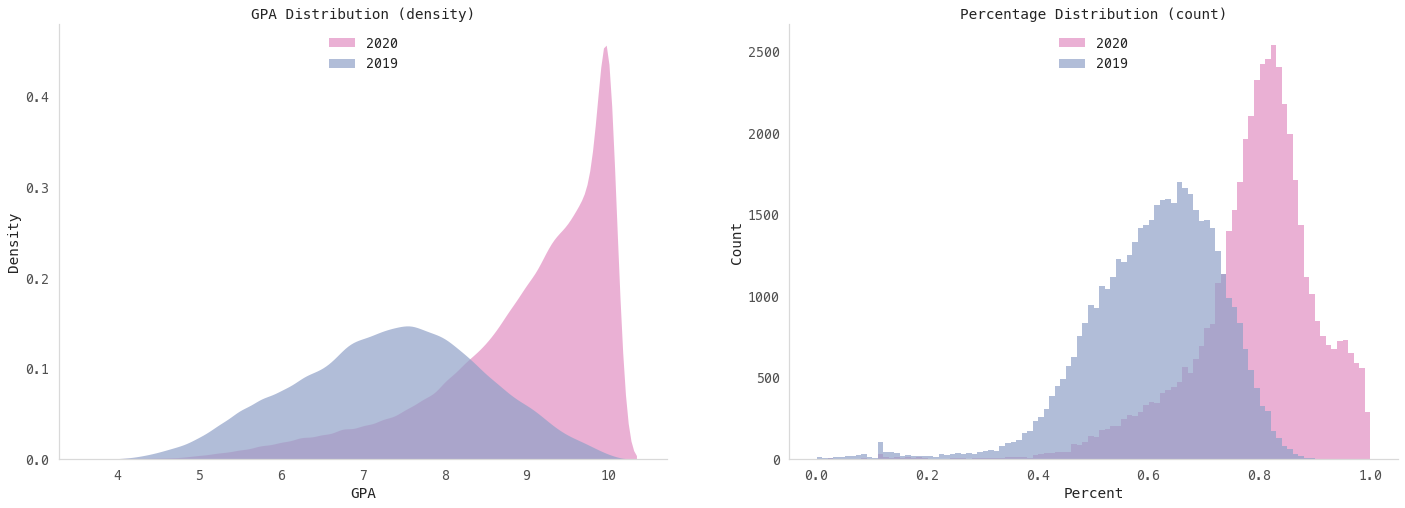

In [17]:
fig = plt.figure(figsize=(24, 8))

# Density Plot for GPA
plt.subplot(1,2,1)
kp = sns.kdeplot(data=dfg, x='gpa', hue='year', fill=True, 
                 linewidth=0, alpha=0.7, legend=False).set_title("GPA Distribution (density)")
plt.legend(['2020','2019'], loc='upper center')
plt.xlabel("GPA")

# Count Plot for Percent
plt.subplot(1,2,2)
kp = sns.histplot(data=dfp, x='percent', hue='year', fill=True, 
                 linewidth=0, alpha=0.7, legend=False, bins=100).set_title("Percentage Distribution (count)")
plt.legend(['2020','2019'], loc='upper center')
plt.xlabel("Percent")

sns.despine()
plt.show()

In [18]:
fig.savefig("./images/AllDist.png")

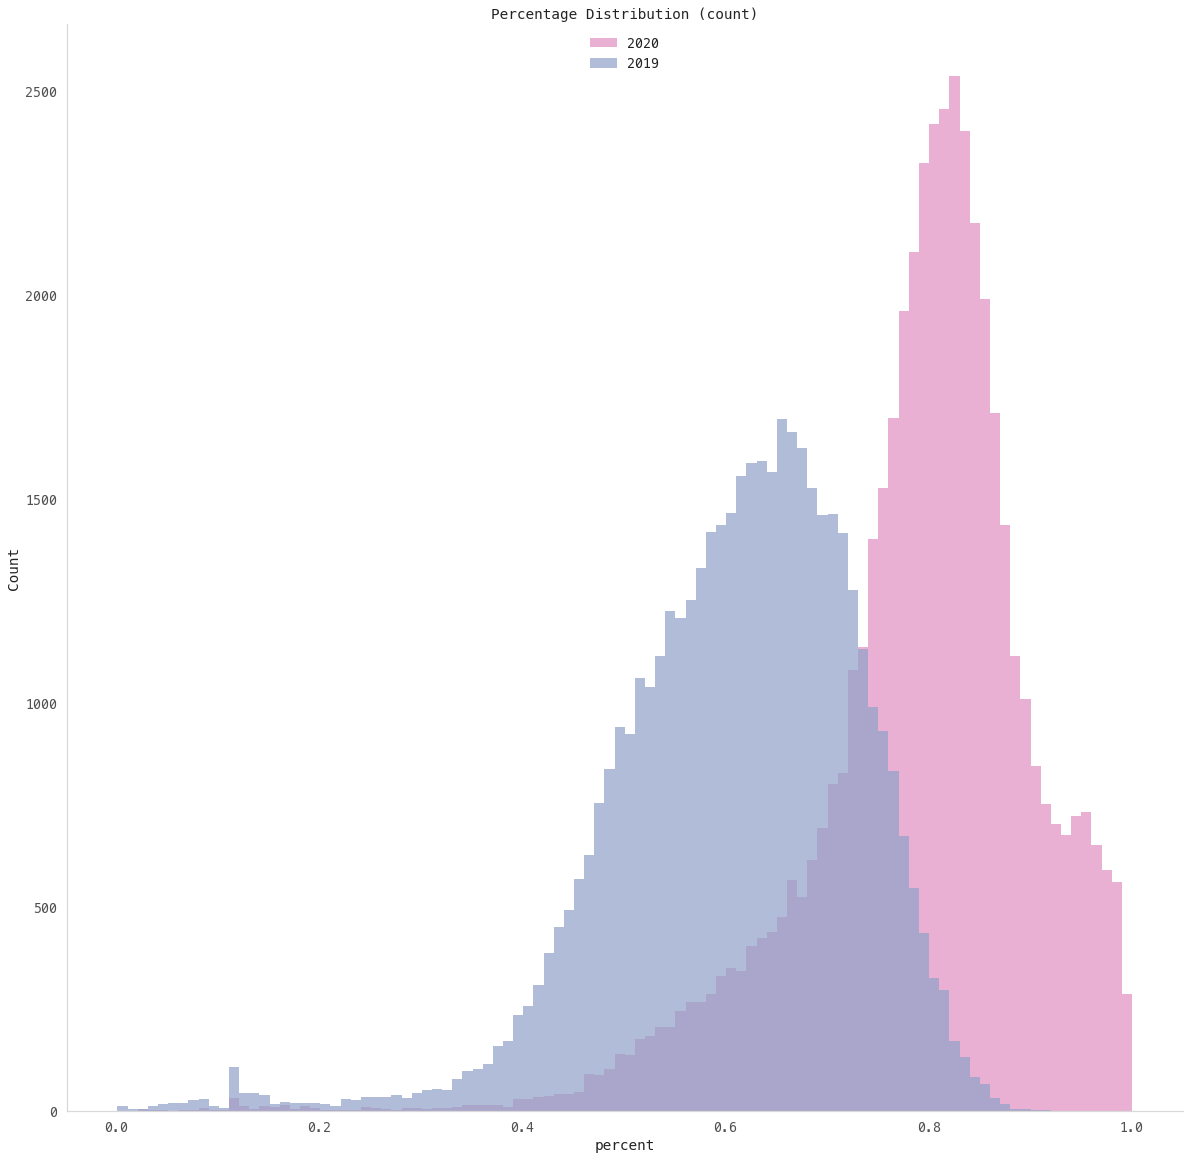

In [19]:
fig = plt.figure(figsize=(20,20))
kp = sns.histplot(data=dfp, x='percent', hue='year', fill=True, 
                 linewidth=0, alpha=0.7, legend=False, bins=100).set_title("Percentage Distribution (count)")
plt.legend(['2020','2019'], loc='upper center')

sns.despine()
plt.show()

In [20]:
fig.savefig("./images/Banner.svg")

**Percentage Stats**

In [21]:
dfp[dfp['year']=='y19'].describe()

,is_female,center,percent,is_eng
count,46216.000000,46216.000000,46216.000000,46216.000000
mean,0.411286,500.010970,0.610342,0.492881
std,0.492072,301.686614,0.120680,0.499955
min,0.000000,10.000000,0.001429,0.000000
25%,0.000000,218.000000,0.540000,0.000000
50%,0.000000,520.000000,0.623333,0.000000
75%,1.000000,742.000000,0.695714,1.000000
max,1.000000,1110.000000,0.918333,1.000000


In [22]:
dfp[dfp['year']=='y20'].describe()

,is_female,center,percent,is_eng
count,48824.000000,48824.000000,48824.000000,48824.000000
mean,0.383787,504.393925,0.790202,0.517573
std,0.486312,308.591211,0.115115,0.499696
min,0.000000,0.000000,0.008333,0.000000
25%,0.000000,211.000000,0.741935,0.000000
50%,0.000000,520.000000,0.806452,1.000000
75%,1.000000,776.000000,0.858571,1.000000
max,1.000000,1110.000000,1.000000,1.000000


In [23]:
# 97 percentile in 2019 and 2020
np.quantile(dfp[dfp['year']=='y19']['percent'], 0.97), np.quantile(dfp[dfp['year']=='y20']['percent'], 0.97)

(0.795, 0.97)

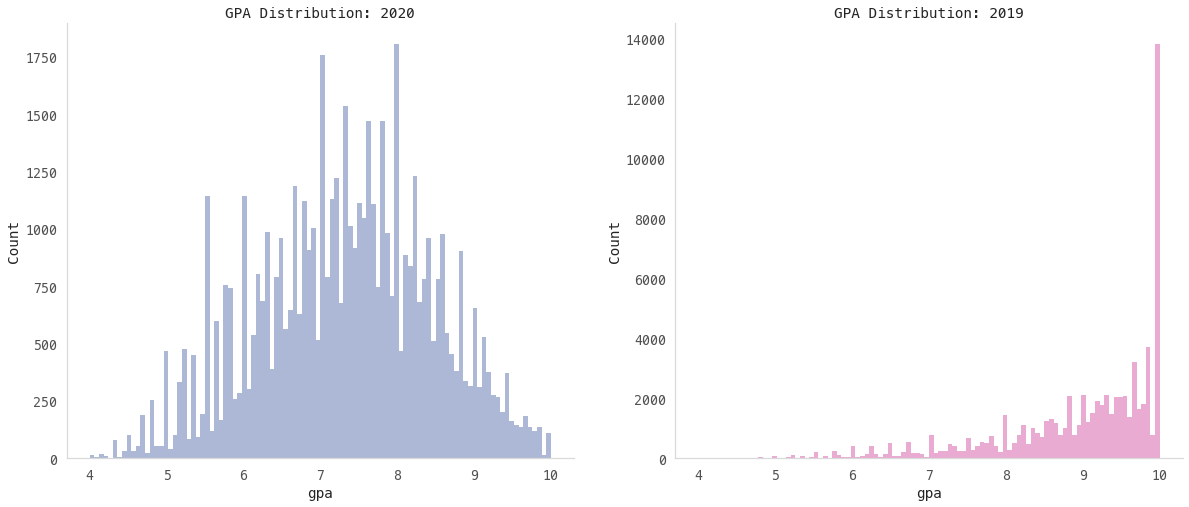

In [24]:
fig = plt.figure(figsize=(20,8))

dfg20 = dfg[dfg['year'] == 'y20']
dfg19 = dfg[dfg['year'] == 'y19']

# Density Plot for GPA
plt.subplot(1,2,1)
kp = sns.histplot(data=dfg19, x='gpa', fill=True, 
                 linewidth=0, legend=False, bins=100).set_title("GPA Distribution: 2020")

# Count Plot for Percent
plt.subplot(1,2,2)
kp = sns.histplot(data=dfg20, x='gpa', fill=True, 
                 linewidth=0, legend=False, bins=100, color=fg_pal[1]).set_title("GPA Distribution: 2019")

sns.despine()
plt.show()

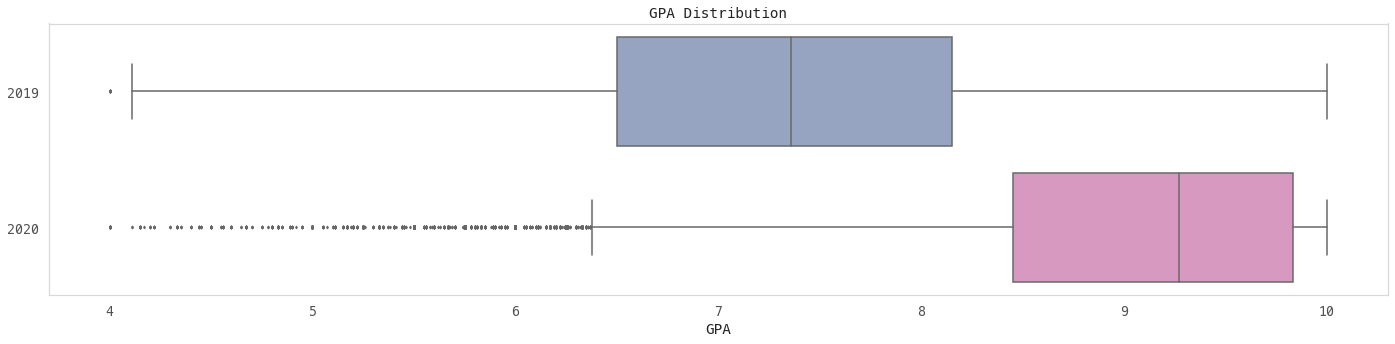

In [25]:
fig = plt.figure(figsize=(24,5))
sns.boxplot(data=dfg, y='year', x='gpa', fliersize=2).set_title("GPA Distribution")
plt.yticks([0,1],[2019, 2020])
plt.ylabel('')
plt.xlabel('GPA')
plt.show()

In [26]:
fig.savefig("./images/Box.png")

**GPA Stats**

In [27]:
dfg19.describe()

,is_female,center,gpa,is_eng
count,55122.000000,55122.000000,55122.000000,55122.000000
mean,0.511465,496.912884,7.316144,0.347411
std,0.499873,297.730755,1.137264,0.476152
min,0.000000,0.000000,4.000000,0.000000
25%,0.000000,220.000000,6.500000,0.000000
50%,1.000000,500.000000,7.360000,0.000000
75%,1.000000,758.000000,8.150000,1.000000
max,1.000000,1110.000000,10.000000,1.000000


In [28]:
dfg20.describe()

,is_female,center,gpa,is_eng
count,72618.000000,72618.000000,72618.000000,72618.000000
mean,0.459500,507.127599,8.956363,0.343166
std,0.498361,307.767724,1.075170,0.474769
min,0.000000,0.000000,4.000000,0.000000
25%,0.000000,217.000000,8.450000,0.000000
50%,0.000000,522.000000,9.270000,0.000000
75%,1.000000,776.000000,9.830000,1.000000
max,1.000000,1110.000000,10.000000,1.000000


In [29]:
# 97 percentile in 2019 and 2020
np.quantile(dfg[dfg['year']=='y19']['gpa'], 0.85), np.quantile(dfg[dfg['year']=='y20']['gpa'], 0.85)

(8.54, 10.0)

### Expedience Calculations

#### Visualizing the stat measures

In [30]:
ex_pal = fg_pal

In [31]:
n = np.random.normal(size=100000)
n = (n - n.mean())

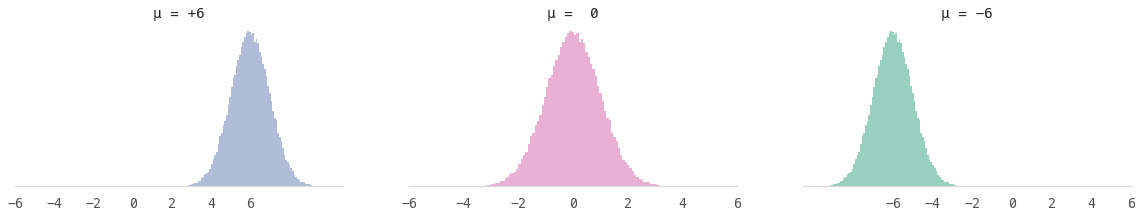

In [32]:
means = [6, 0, -6]
fig = plt.figure(figsize=(20,3))
for i, m in enumerate(means):
    plt.subplot(1,3,1+i)
    sns.histplot(n+m, bins=100, color=ex_pal[i], alpha=0.7, linewidth=0)\
        .set_title(f"μ = {'+' if m > 0 else ' ' if m == 0 else ''}{m}")
    sns.despine(left=True); plt.yticks([]); plt.ylabel("")
    plt.xticks([*range(-6,7,2)])

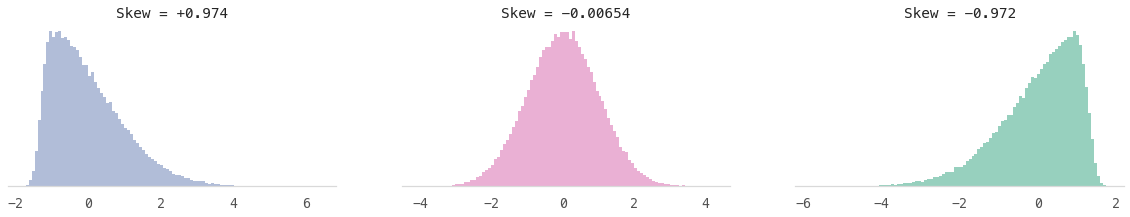

In [33]:
fig = plt.figure(figsize=(20, 3))
for i, a in enumerate([10,0,-10]):
    s = stats.skewnorm.rvs(a, loc=0, size=100000)
    s = s - s.mean()
    s = s / s.std()
    plt.subplot(1,3,i+1)
    sk = stats.skew(s)
    sns.histplot(s, bins=100, color=fg_pal[i], alpha=0.7, linewidth=0).set_title(f"Skew = {'+' if sk>0 else ''}{sk:0.3}")
    sns.despine(left=True); plt.yticks([]); plt.ylabel("")
    if abs(sk) < 0.0: plt.xticks([*range(-6,7,2)])

#### Calculations

In [34]:
def getf(i, counts):
    try:
        return counts[i]
    except:
        return 0
    
def get_mode_cont_dist(x, min_v=None, max_v=None, buckets=40):
    """
    Returns the mode of a continuous distribution having
    bounds `min_v` and `max_v` by collecting into `buckets`.
    """
    if min_v is None:min_v = min(x)
    if max_v is None:max_v = max(x)
        
    bins = np.linspace(min_v, max_v , buckets)
    counts, bins = np.histogram(x, bins)
    step = max_v / buckets
    max_index = np.argmax(counts)
    
    f = getf(max_index, counts)
    f0 = getf(max_index - 1, counts)
    f2 = getf(max_index + 1, counts)
    
    bins = bins[1:]
    return (bins[max_index] - step) + (step) * (f - f0) / ((2*f) - f0 - f2)

def concentration(x, max_v=None):
    """Returns the concentration of a distribution."""
    x = np.array(x)
    if max_v is None: max_v = max(x)
    mode = get_mode_cont_dist(x, max_v=max_v)
    modal_distance = abs(x - mode)
    return (-np.log(modal_distance + 1e-8)).mean()

def expedience(dist_x, dist_r, max_val=10, msg=None):
    """dist_r = reference distribution (2019)"""
    mu_diff = np.mean(dist_x) - np.mean(dist_r)
    sk_diff = stats.skew(dist_x) - stats.skew(dist_r)
    co_diff = concentration(dist_x) - concentration(dist_r)
    mu_term = 10 * mu_diff / max_val
    sk_term = -(5 / 4) * sk_diff
    co_term = max(co_diff, 0) * 4
    if msg is not None:
        print(msg)
        print(f"- diff :: mu: {mu_diff:0.2f}, sk: {sk_diff:0.2f}, co: {co_diff:0.2f}")
        print(f"- term :: mu: {mu_term:0.2f}, sk: {sk_term:0.2f}, co: {co_term:0.2f}")
    return mu_term + sk_term + co_term

In [35]:
x = dfg20['gpa']
r = dfg19['gpa']

expedience(x, r, msg="Test")

Test
- diff :: mu: 1.64, sk: -1.21, co: 0.33
- term :: mu: 1.64, sk: 1.51, co: 1.30


4.455945565003347

In [36]:
def gexp(filters_tuple=(None, None), filters_dict={}, met="gpa", max_val=10, dists=(dfg20, dfg19), msg=None):
    dist_x, dist_r = dists
    
    if len(filters_dict) > 0:
        xmap = dist_x[met] > 0
        rmap = dist_r[met] > 0
        
        for key, val in filters_dict.items():
            xmap &= dist_x[key] == val
            rmap &= dist_r[key] == val
        
        dist_x = dist_x[xmap]
        dist_r = dist_r[rmap]
            
    f_x, f_r = filters_tuple
    if f_x is not None and f_r is not None:
        dist_x = dist_x[f_x]; dist_r = dist_r[f_r]
    return expedience(dist_x[met], dist_r[met], max_val, msg=msg)

### Counts: By Year and Gender

In [37]:
def annotate(cp, offset=0.05):
    for p in cp.patches:
        val = f" {p.get_width()}"
        x, y = p.get_xy()
        y = y + p.get_height() / 2 + offset
        plt.annotate(val, (x, y), color=bg_pal[0])

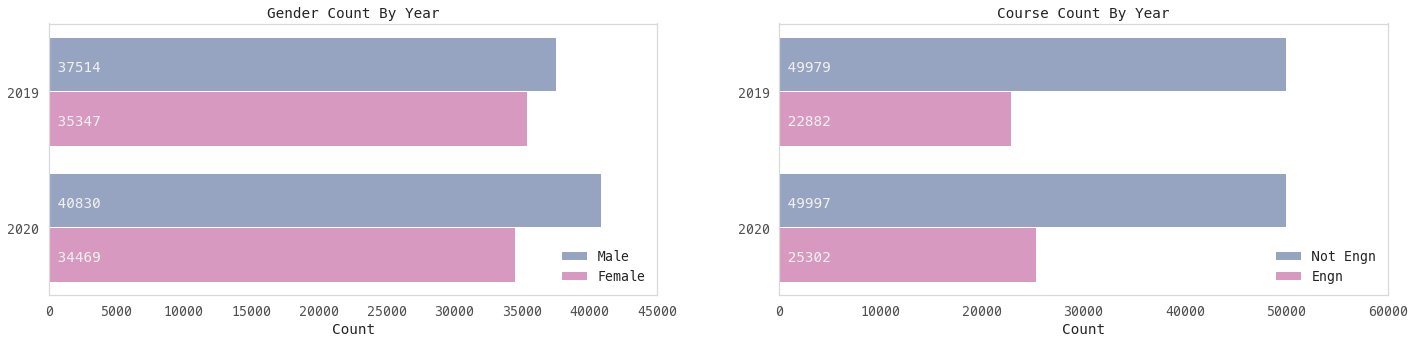

In [38]:
fig = plt.figure(figsize=(24,5))

plt.subplot(1,2,1)
cp = sns.countplot(data=df, y='year', hue="is_female")
cp.set_title("Gender Count By Year")
annotate(cp)
plt.ylabel('')
plt.xlabel('Count')
plt.yticks([0,1], [2019, 2020])
plt.legend(["Male", "Female"])
plt.xlim(0,45000)

plt.subplot(1,2,2)
cp = sns.countplot(data=df, y='year', hue="is_eng")
cp.set_title("Course Count By Year")
annotate(cp)
plt.ylabel('')
plt.xlabel('Count')
plt.yticks([0,1], [2019, 2020])
plt.legend(["Not Engn", "Engn"])
plt.xlim(0,60000)

plt.show()

In [39]:
fig.savefig("./images/CountGB.png")

### Counts: By Course

In [40]:
name_dict = {
    'bcom_fm':'B.Com\nFin Mgt', 'bed':'B.Ed', 'bcom_af':'B.Com\nAcc & Fin', 
    'mms':'M.M.S', 'llb':'LL.B', 'bpharm':'B.Pharm', 'ba':'B.A', 'bcom_bi':'B.Com\nBnk & Ins',
    'comp':'Comps', 'chem':'Chem', 'electronics':'Electronics', 'civil':'Civil',
    'electrical':'Electrical', 'mech':'Mech', 'it':'I.T', 'extc':'EXTC'
}

def set_ticks(nd=name_dict):
    ticks = plt.yticks()[1]
    labels = [nd[t.get_text()] for t in ticks]
    plt.yticks(list(range(len(ticks))), labels)
    
counts = df[['course','year','is_female','name']] \
    .groupby(['course', 'year', 'is_female']) \
    .count().copy().rename(columns={'name':'count'})

def annotate(cp, offset=0.05):
    for p in cp.patches:
        val = f" {p.get_width()}"
        x, y = p.get_xy()
        y = y + p.get_height() / 2 + offset
        cp.annotate(val, (x, y), color=bg_pal[0])
def annotate_out(b):
    for p in b.patches:
        w = p.get_width()
        val = f"{w}"
        x, y = p.get_xy()
        y = y + p.get_height() / 2 - 0.05
        plt.annotate(val, (w + 100, y), color=bg_pal[-3])
        
def plt_count(keys, counts=counts):
    k = sorted(keys, key=lambda b:counts.loc[b].sum()['count'])
    gl = lambda ks: [name_dict[k]for k in ks]
    gc = lambda keys, k1='y19', k2=0: np.array([counts.loc[(k, k1, k2)]['count'] for k in keys])

    b19m = gc(k, 'y19', 0)
    b20m = gc(k, 'y20', 0)
    b19f = gc(k, 'y19', 1)
    b20f = gc(k, 'y20', 1)
    idx = np.arange(len(k))
    
    h = 0.4

    c19f = fg_pal[0]
    c19m = sns.desaturate(c19f, 0.6)
    c20f = fg_pal[1]
    c20m = sns.desaturate(c20f, 0.6)


    # Female
    b1 = plt.barh(idx + h, b19m + b19f, height=h, label='2019, Female', color=c19f)
    annotate_out(b1)
    b2 = plt.barh(idx, b20m + b20f, height=h, label='2020, Female', color=c20f)
    annotate_out(b2)

    # Male
    b3 = plt.barh(idx + h, b19m, height=h, label='2019, Male', color=c19m)
    b4 = plt.barh(idx, b20m, height=h, label='2020, Male', color=c20m)
    
    plt.yticks(idx + 0.2,gl(k))

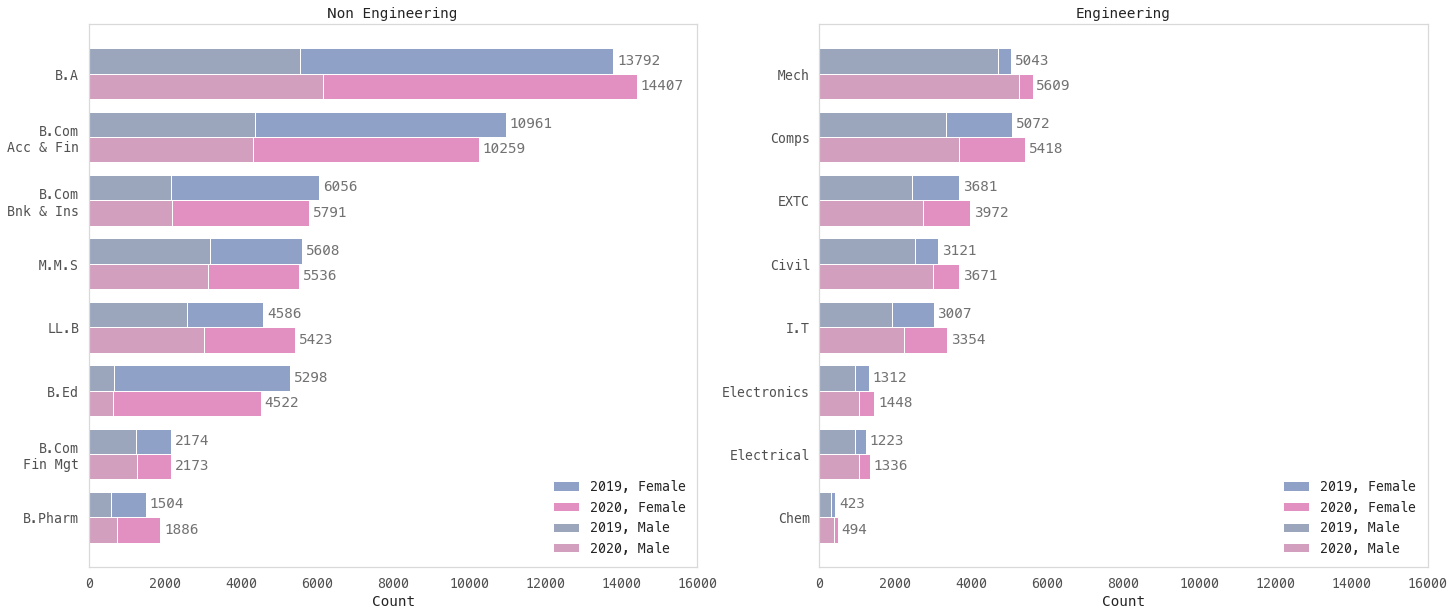

In [41]:
fig = plt.figure(figsize=(24,10))

plt.subplot(1,2,1, title="Non Engineering")
plt_count(non_eng)
plt.xlim(0, 16000)
plt.xlabel("Count")
plt.legend(loc='lower right')

plt.subplot(1,2,2, title="Engineering")
plt_count(eng)
plt.xlim(0, 16000)
plt.xlabel("Count")
plt.legend(loc='lower right')

plt.show()

In [42]:
fig.savefig("./images/CountBr.png")

### Dist: Girls vs Boys

Boys
- diff :: mu: 1.77, sk: -1.28, co: 0.26
- term :: mu: 1.77, sk: 1.60, co: 1.03
Girls
- diff :: mu: 1.53, sk: -1.11, co: 0.46
- term :: mu: 1.53, sk: 1.38, co: 1.84


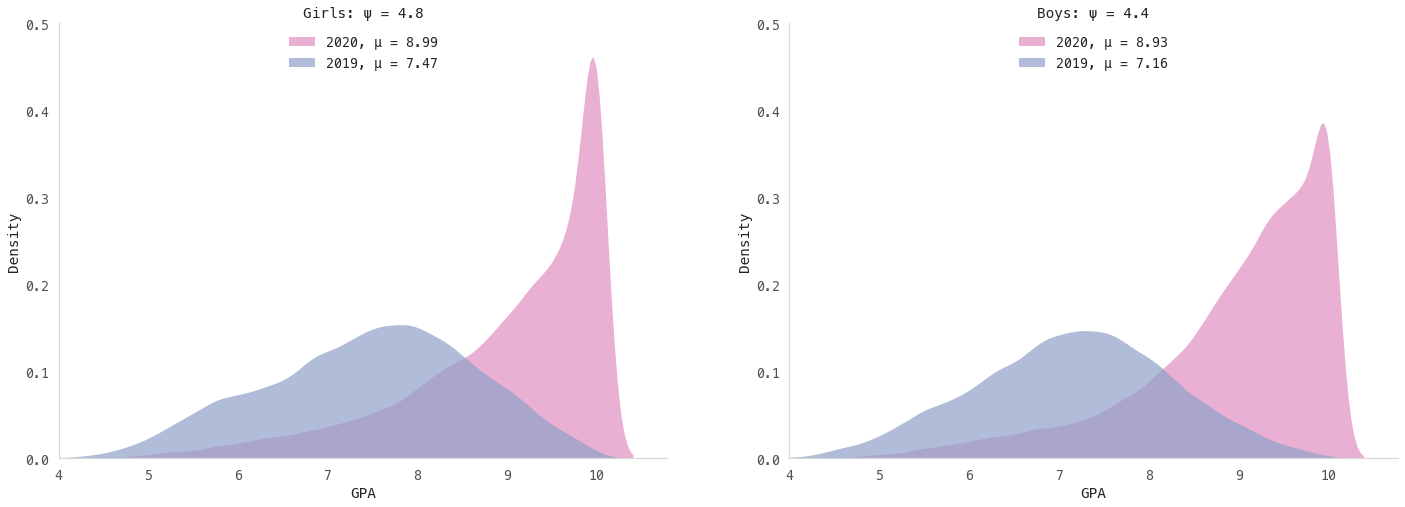

In [43]:
fig = plt.figure(figsize=(24,8))

me = gexp(filters_dict={'is_female':0}, msg="Boys")
fe = gexp(filters_dict={'is_female':1}, msg="Girls")

plt.subplot(1,2,1)
fd = dfg[dfg['is_female'] == 1]
sns.kdeplot(data=fd, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
    .set_title(f"Girls: ψ = {fe:0.2}")
plt.ylim(0, 0.5)
plt.xlabel('GPA')
plt.legend([f'2020, μ = {fd[fd["year"]=="y20"]["gpa"].mean():0.2f}', 
            f'2019, μ = {fd[fd["year"]=="y19"]["gpa"].mean():0.2f}'], loc='upper center')
plt.xlim(4,)
sns.despine()


plt.subplot(1,2,2)
bd = dfg[dfg['is_female'] == 0]
sns.kdeplot(data=bd, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
    .set_title(f"Boys: ψ = {me:0.2}")
plt.ylim(0, 0.5)
plt.xlabel('GPA')
plt.legend([f'2020, μ = {bd[bd["year"]=="y20"]["gpa"].mean():0.2f}', 
            f'2019, μ = {bd[bd["year"]=="y19"]["gpa"].mean():0.2f}'], loc='upper center')
plt.xlim(4,)
sns.despine()

plt.show()

In [44]:
fig.savefig("./images/GenderDist.png")

### Dist: Eng vs Non Eng

NEng
- diff :: mu: 1.63, sk: -1.07, co: 0.52
- term :: mu: 1.63, sk: 1.34, co: 2.09
Eng
- diff :: mu: 1.66, sk: -1.22, co: 0.38
- term :: mu: 1.66, sk: 1.53, co: 1.54


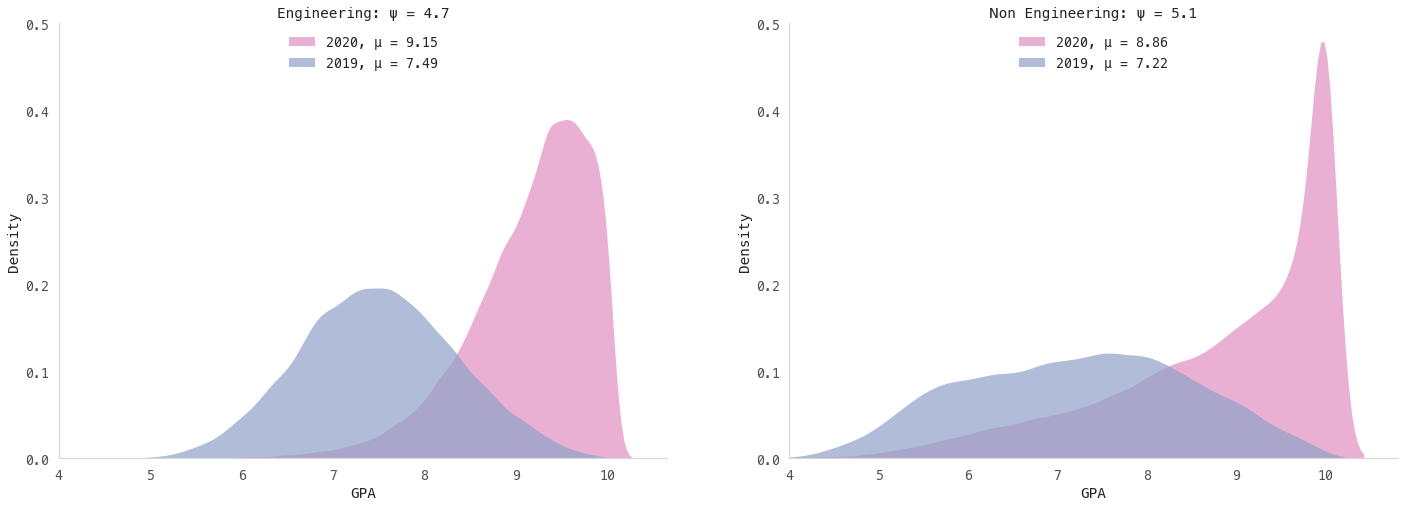

In [45]:
fig = plt.figure(figsize=(24,8))

me = gexp(filters_dict={'is_eng':0}, msg='NEng')
fe = gexp(filters_dict={'is_eng':1}, msg='Eng')

d = dfg[dfg['is_eng'] == 1]
plt.subplot(1,2,1)
sns.kdeplot(data=d, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
    .set_title(f"Engineering: ψ = {fe:0.2}")
plt.ylim(0, 0.5)
plt.xlabel('GPA')
plt.legend([f'2020, μ = {d[d["year"] == "y20"]["gpa"].mean():0.2f}',
            f'2019, μ = {d[d["year"] == "y19"]["gpa"].mean():0.2f}'], loc='upper center')
plt.xlim(4,)
sns.despine()

plt.subplot(1,2,2)
d = dfg[dfg['is_eng'] == 0]
sns.kdeplot(data=d, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
    .set_title(f"Non Engineering: ψ = {me:0.2}")
plt.ylim(0, 0.5)
plt.xlabel('GPA')
plt.legend([f'2020, μ = {d[d["year"] == "y20"]["gpa"].mean():0.2f}',
            f'2019, μ = {d[d["year"] == "y19"]["gpa"].mean():0.2f}'], loc='upper center')
plt.xlim(4,)
sns.despine()

plt.show()

In [46]:
fig.savefig("./images/BranchDist.png")

Percentage of 10 pointers:

In [47]:
d = dfg[(dfg['is_eng'] == 0) & (dfg['year']=='y20')]
print((d['gpa'] == 10).sum()/len(d)*100)

d = dfg[(dfg['is_eng'] == 1) & (dfg['year']=='y20')]
print((d['gpa'] == 10).sum()/len(d)*100)

25.2526311375739
5.573836276083467


In [48]:
d = dfg[(dfg['is_eng'] == 0) & (dfg['year']=='y19')]
print((d['gpa'] == 10).sum()/len(d)*100)

d = dfg[(dfg['is_eng'] == 1) & (dfg['year']=='y19')]
print((d['gpa'] == 10).sum()/len(d)*100)

0.29467363504948296
0.01566579634464752


### Dist: By Course, Engineering

comp
- diff :: mu: 1.54, sk: -1.20, co: 0.38
- term :: mu: 1.54, sk: 1.51, co: 1.54
chem
- diff :: mu: 1.39, sk: -1.07, co: 0.28
- term :: mu: 1.39, sk: 1.34, co: 1.12
electronics
- diff :: mu: 1.57, sk: -1.06, co: 0.25
- term :: mu: 1.57, sk: 1.32, co: 1.00
civil
- diff :: mu: 1.40, sk: -0.79, co: 0.41
- term :: mu: 1.40, sk: 0.99, co: 1.64
electrical
- diff :: mu: 1.46, sk: -0.71, co: 0.20
- term :: mu: 1.46, sk: 0.89, co: 0.78
mech
- diff :: mu: 1.91, sk: -1.82, co: 0.46
- term :: mu: 1.91, sk: 2.28, co: 1.85
it
- diff :: mu: 1.55, sk: -1.00, co: 0.13
- term :: mu: 1.55, sk: 1.25, co: 0.51
extc
- diff :: mu: 1.95, sk: -1.71, co: 0.37
- term :: mu: 1.95, sk: 2.13, co: 1.49


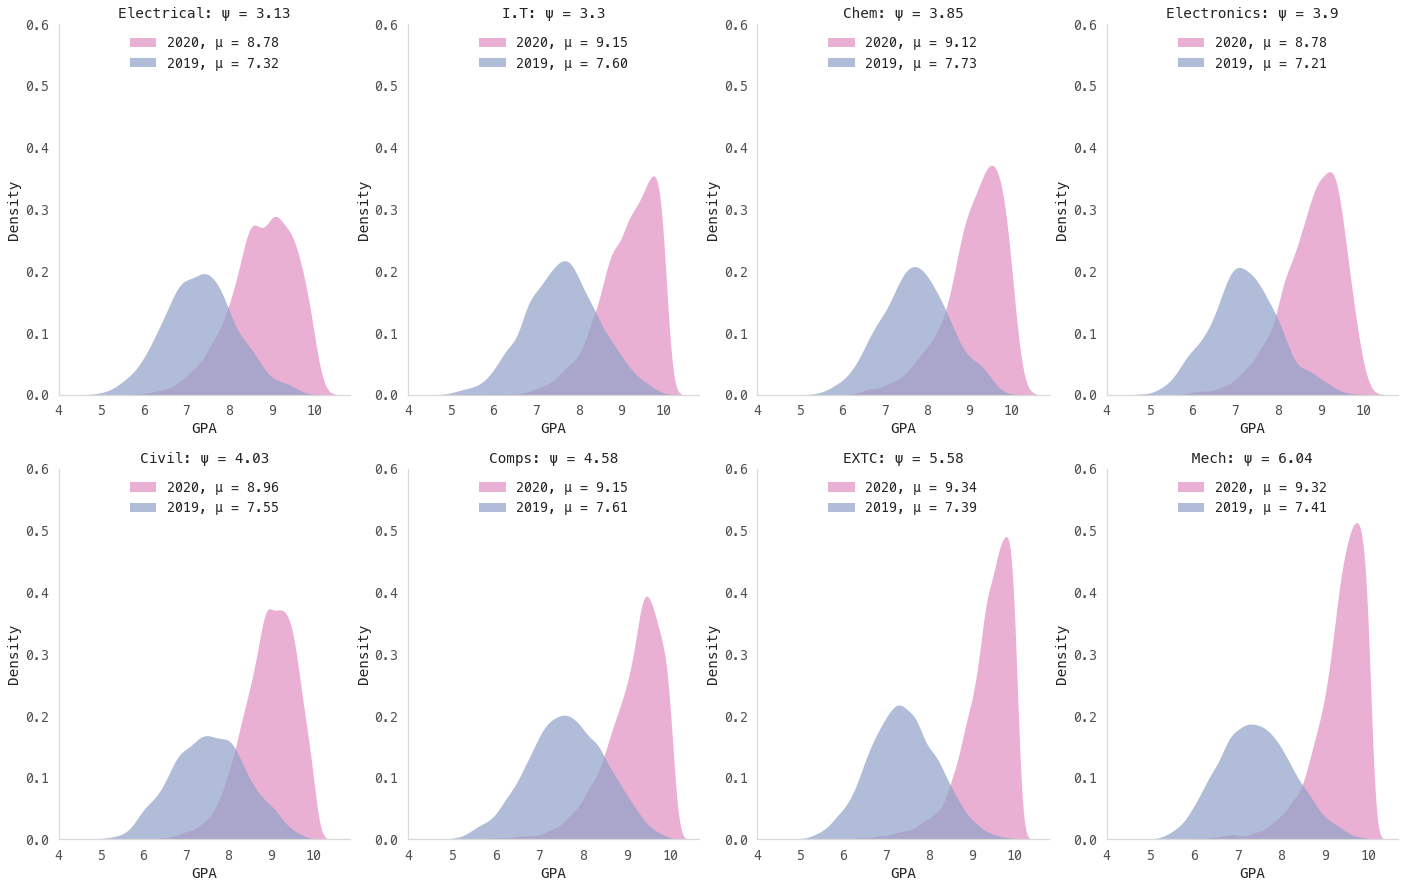

In [49]:
ex = {b:gexp(filters_dict={'course':b}, msg=b) for b in eng}
fig = plt.figure(figsize=(24,15))

for i,b in enumerate(sorted(eng, key=lambda e:ex[e])):
    plt.subplot(2,4,1+i)
    d = dfg[dfg['course'] == b]
    sns.kdeplot(data=d, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
        .set_title(f"{name_dict[b]}: ψ = {ex[b]:0.3}")
    plt.ylim(0, 0.6)
    plt.xlim(4)
    plt.xlabel('GPA')
    sns.despine()
    plt.legend([f'2020, μ = {d[d["year"] == "y20"]["gpa"].mean():0.2f}',
                f'2019, μ = {d[d["year"] == "y19"]["gpa"].mean():0.2f}'], loc='upper center')

In [50]:
fig.savefig("./images/EngDist.png")

### Dist: By Course, Non Engineering

bcom_fm
- diff :: mu: 1.61, sk: -1.67, co: 0.77
- term :: mu: 1.61, sk: 2.09, co: 3.08
bed
- diff :: mu: 0.72, sk: -0.49, co: -0.07
- term :: mu: 0.72, sk: 0.61, co: 0.00
bcom_af
- diff :: mu: 1.64, sk: -2.10, co: 1.11
- term :: mu: 1.64, sk: 2.62, co: 4.44
mms
- diff :: mu: 1.38, sk: -0.90, co: -0.16
- term :: mu: 1.38, sk: 1.13, co: 0.00
llb
- diff :: mu: 1.66, sk: -0.20, co: -1.06
- term :: mu: 1.66, sk: 0.25, co: 0.00
bpharm
- diff :: mu: 0.84, sk: -0.22, co: -0.15
- term :: mu: 0.84, sk: 0.27, co: 0.00
ba
- diff :: mu: 2.50, sk: -1.65, co: 0.38
- term :: mu: 2.50, sk: 2.07, co: 1.50
bcom_bi
- diff :: mu: 1.99, sk: -1.63, co: 0.80
- term :: mu: 1.99, sk: 2.04, co: 3.18


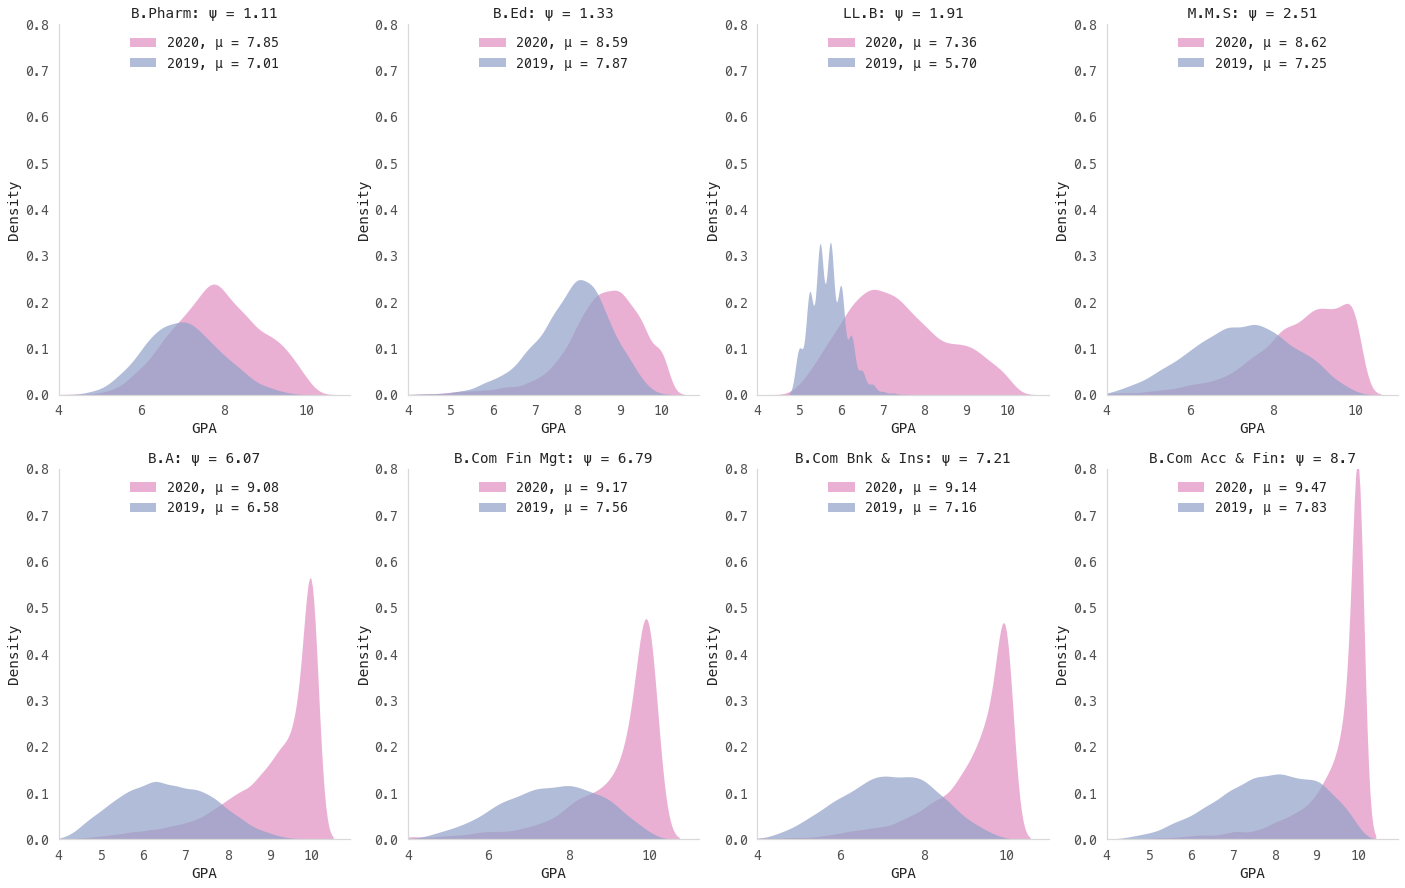

In [51]:
br = non_eng
ex = {b:gexp(filters_dict={'course':b}, msg=b) for b in br}
fig = plt.figure(figsize=(24,15))

for i,b in enumerate(sorted(br, key=lambda e:ex[e])):
    plt.subplot(2,4,1+i)
    n = name_dict[b].replace('\n', ' ')
    d = dfg[dfg['course'] == b]
    sns.kdeplot(data=d, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
        .set_title(f"{n}: ψ = {ex[b]:0.3}")
    plt.ylim(0, 0.8)
    plt.xlim(4)
    plt.xlabel('GPA')
    sns.despine()
    plt.legend([f'2020, μ = {d[d["year"] == "y20"]["gpa"].mean():0.2f}',
                f'2019, μ = {d[d["year"] == "y19"]["gpa"].mean():0.2f}'], loc='upper center')

In [52]:
fig.savefig("./images/NonEngDist.png")

### RegPlot: Exp vs Avg

In [53]:
d = dfg[dfg['is_eng']==1][['center','year','course','gpa']]
rows = [(r[1]['center'], r[1]['year'], r[1]['course']) for r in d.iterrows()]
rows = set(rows)
center_nums = list(set(c for c,*_ in rows))

# dict of {center_no: (y19_df, y20_df)}
centers = {}
for c in center_nums:
    try:
        centers[c] = d[(d['center'] == c)]
    except:
        continue
        
def get_centers_sorted(c):
    d = centers[c]
    y19 = d[d['year']=='y19']
    y20 = d[d['year']=='y20']
    return (
        y19['gpa'].median(),
        y19['gpa'].mean(),
        get_mode_cont_dist(y19['gpa']),
        expedience(y20['gpa'], y19['gpa'])
    )

# list of tuples [(centerno, y19_median, y19_mean, y19_mode),...]
cnm = [(c, *get_centers_sorted(c)) for c in centers]

In [54]:
cndf = pd.DataFrame(cnm, columns=["center_no", "y19_median", "y19_mean", "y19_mode", "expedience"])

#### Correlation scatter plots

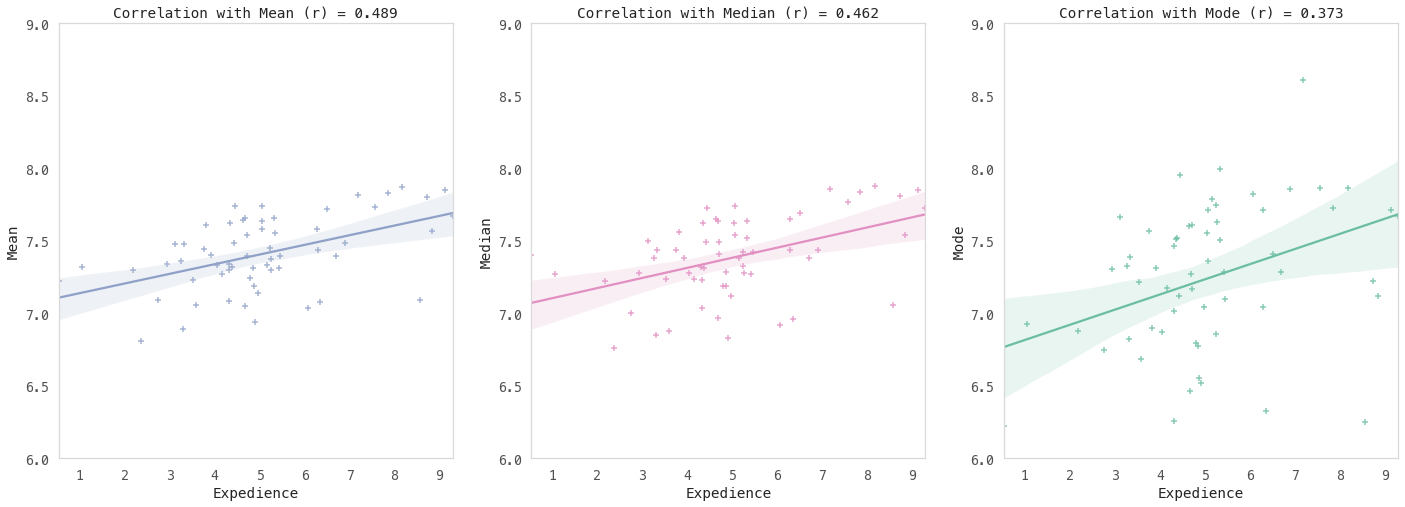

In [55]:
fig = plt.figure(figsize=(24,8))
for i, m in enumerate(['y19_mean', 'y19_median', 'y19_mode'], 1):
    r, _ = stats.pearsonr(cndf[m], cndf['expedience'])
    l = m.split("_")[1]
    plt.subplot(1,3,i, title=f"Correlation with {l.title()} (r) = {r:0.3f}")
    sns.regplot(data=cndf, y=m, x="expedience", color=fg_pal[i-1], marker='+')
    plt.ylim(6,9)
    plt.ylabel(l.title())
    plt.xlabel('Expedience')

In [56]:
fig.savefig("./images/RegPlot.png")

### Dist: Grouped by Colleges

In [57]:
cnm_by_exp = sorted(cnm, key=lambda x: -x[4])
cnm_by_mean = sorted(cnm, key=lambda x: -x[2])

In [58]:
print(f"number of centers: {len(cnm)}")

number of centers: 61


In [59]:
def plot_dist(cnm):
    for i,(c,median,mean,mode,exp) in enumerate(cnm[:8]):
        d = centers[c]
        plt.subplot(2,4,1+i)
        n = center_names_eng[c]
        sns.kdeplot(data=d, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
            .set_title(f"{n}: ψ = {exp:0.3}")
        plt.ylim(0, 1.0)
        plt.xlim(4)
        plt.xlabel('GPA')
        sns.despine()
        plt.legend([f'2020, μ = {d[d["year"] == "y20"]["gpa"].mean():0.2f}',
                    f'2019, μ = {d[d["year"] == "y19"]["gpa"].mean():0.2f}'], loc='upper center')

#### By College Names, Expedience Sorted

##### Ascending order

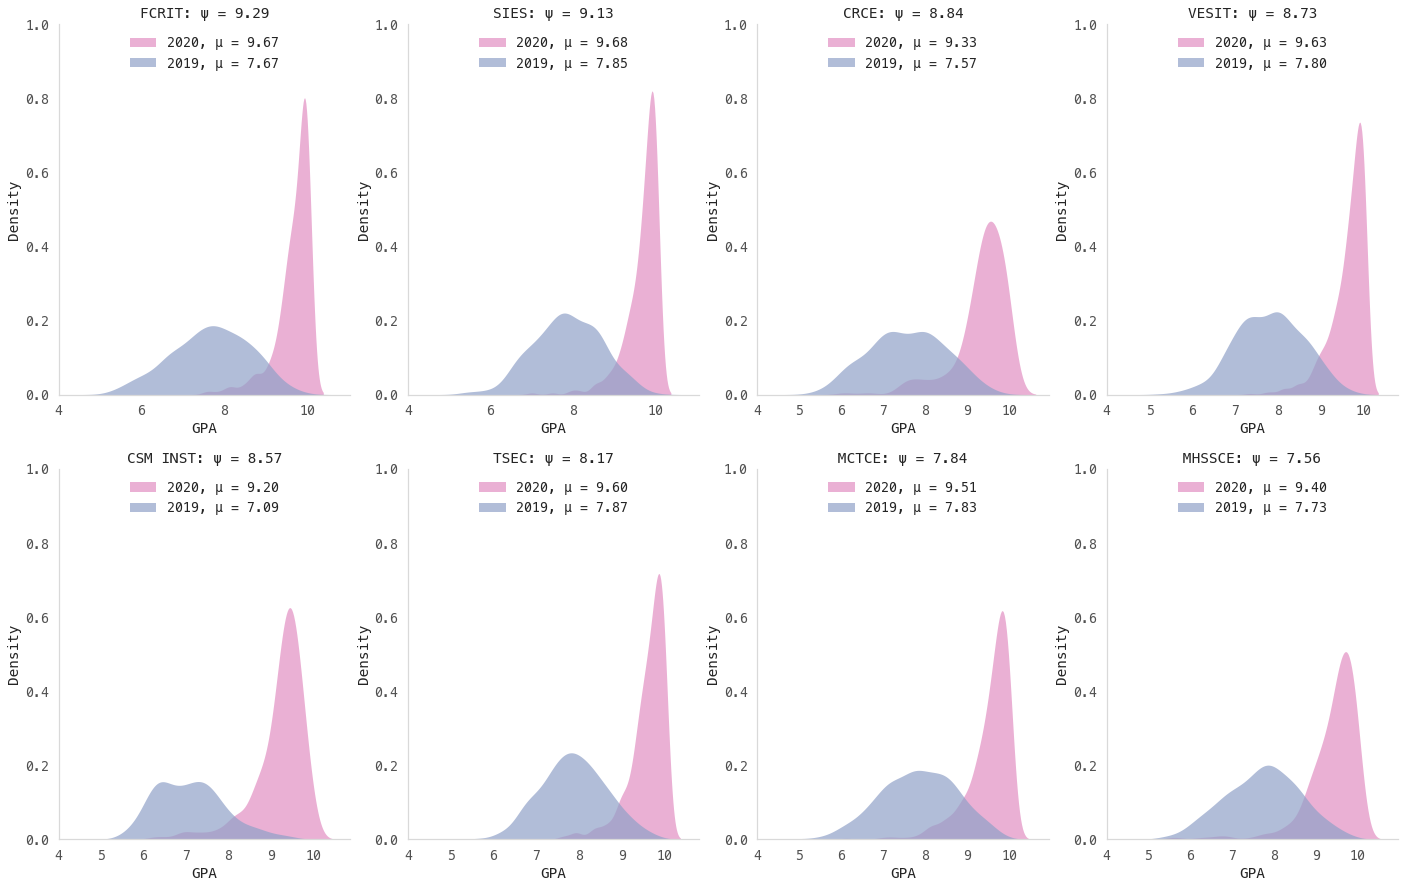

In [60]:
fig = plt.figure(figsize=(24,15))
plot_dist(cnm_by_exp)

In [61]:
fig.savefig("./images/ExpDesc.png")

##### Descending order

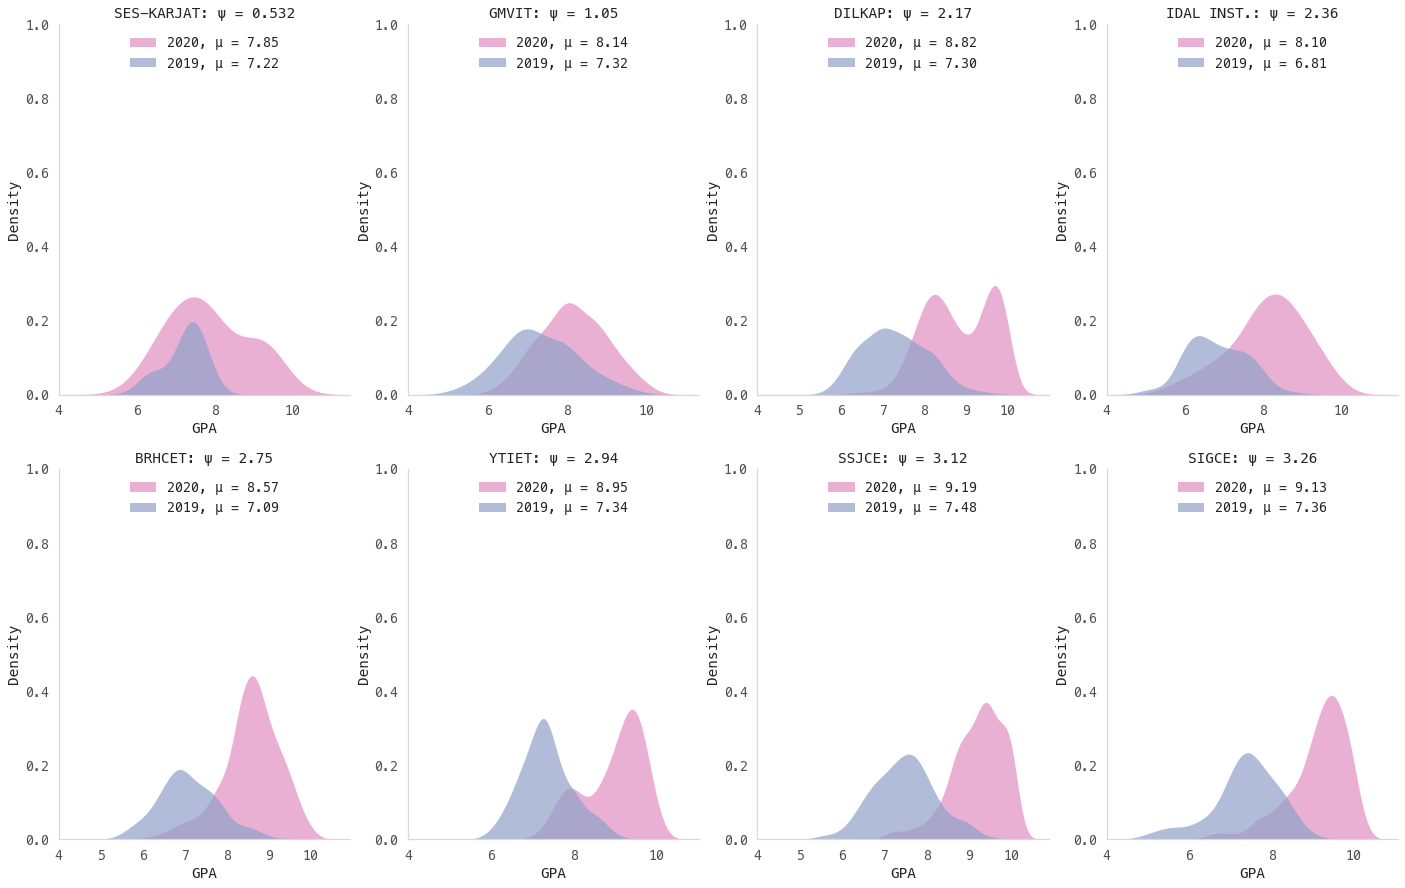

In [62]:
fig = plt.figure(figsize=(24,15))
plot_dist(cnm_by_exp[::-1])

In [63]:
fig.savefig("./images/ExpAsc.png")

#### By College Names, Mean Sorted

##### Ascending order

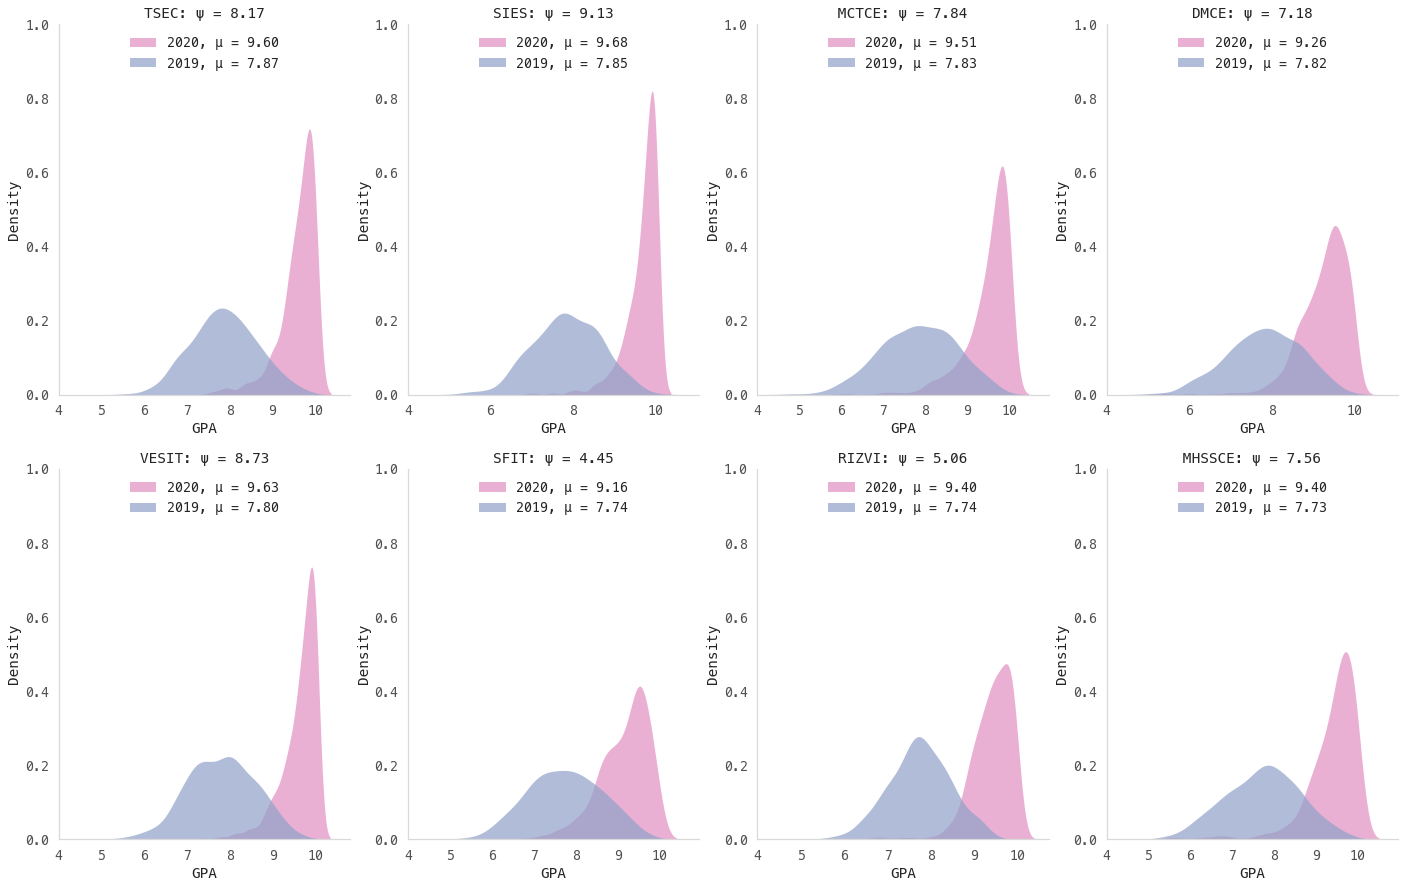

In [64]:
fig = plt.figure(figsize=(24,15))
plot_dist(cnm_by_mean)

##### Descending order

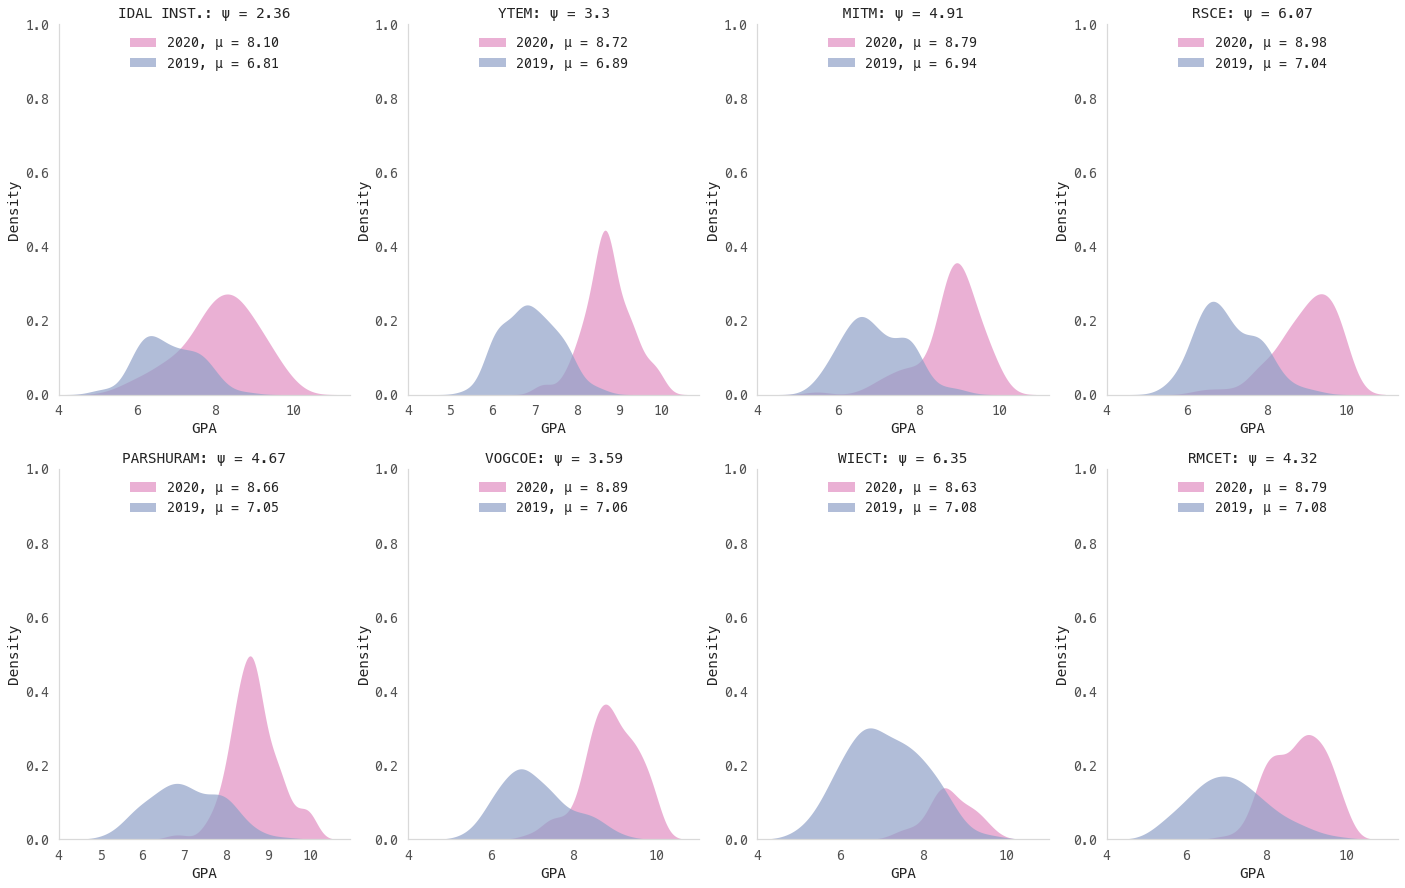

In [65]:
fig = plt.figure(figsize=(24,15))
plot_dist(cnm_by_mean[::-1])

### Dist: By Branch

#### DBIT

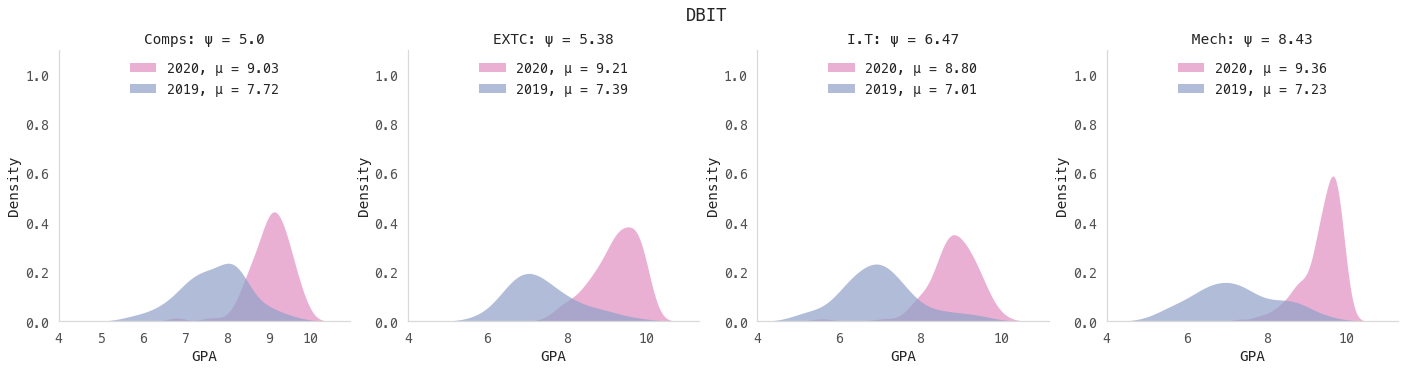

In [66]:
fig = plt.figure(figsize=(24,5))
fig.suptitle("DBIT", y=1)
for i,p in enumerate(['comp', 'extc', 'it', 'mech'], 1):
    d = dfg[(dfg['center'] == 688) & (dfg['course'] == p)]
    plt.subplot(1,4,i)
    y20 = d[d["year"] == "y20"]["gpa"]
    y19 = d[d["year"] == "y19"]["gpa"]
    exp = expedience(y20, y19)
    
    sns.kdeplot(data=d, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
        .set_title(f"{name_dict[p]}: ψ = {exp:0.3}")
    plt.ylim(0, 1.1)
    plt.xlim(4)
    plt.xlabel('GPA')
    sns.despine()
    plt.legend([f'2020, μ = {y20.mean():0.2f}',
                f'2019, μ = {y19.mean():0.2f}'], loc='upper center')
    

In [67]:
fig.savefig("../images/DBIT.png")

#### FCRIT

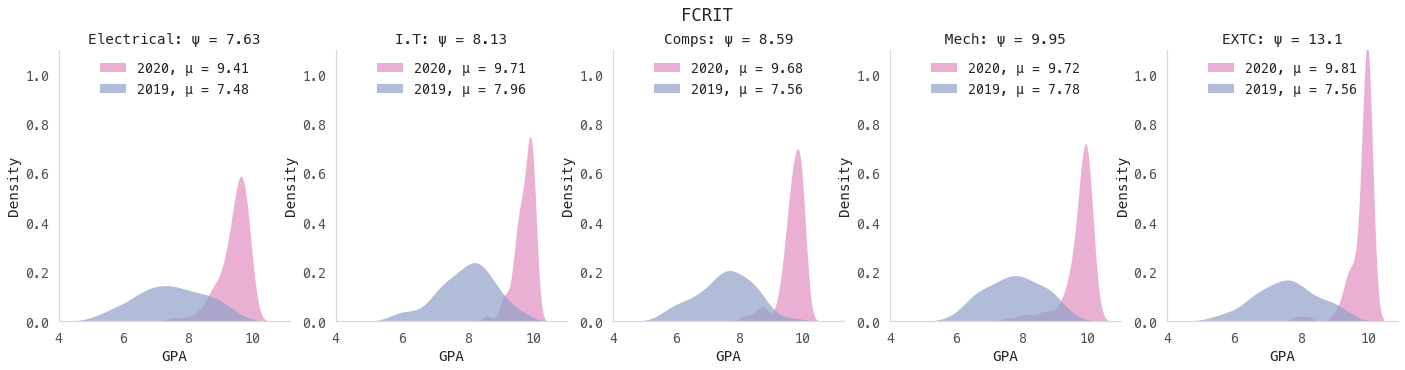

In [68]:
fig = plt.figure(figsize=(24,5))
fig.suptitle("FCRIT", y=1)
for i,p in enumerate(['electrical', 'it', 'comp', 'mech', 'extc'], 1):
    d = dfg[(dfg['center'] == 426) & (dfg['course'] == p)]
    plt.subplot(1,5,i)
    y20 = d[d["year"] == "y20"]["gpa"]
    y19 = d[d["year"] == "y19"]["gpa"]
    exp = expedience(y20, y19)
    sns.kdeplot(data=d, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
        .set_title(f"{name_dict[p]}: ψ = {exp:0.3}")
    plt.ylim(0, 1.1)
    plt.xlim(4)
    plt.xlabel('GPA')
    sns.despine()
    plt.legend([f'2020, μ = {y20.mean():0.2f}',
                f'2019, μ = {y19.mean():0.2f}'], loc='upper center')
    

In [69]:
fig.savefig("./images/FCRIT.png")

### Dist: Handpicked Colleges

In [70]:
def plot_single_college(c):
    c,median,mean,mode,exp = list(filter(lambda x:x[0] == c, cnm))[0]
    d = centers[c]
    sns.kdeplot(data=d, x='gpa', hue='year', fill=True, linewidth=0, alpha=0.7)\
        .set_title(f"{center_names_eng[c]}: ψ = {exp:0.3}")
    plt.ylim(0, 1.0)
    plt.xlim(4)
    plt.xlabel('GPA')
    sns.despine()
    plt.legend([f'2020, μ = {d[d["year"] == "y20"]["gpa"].mean():0.2f}',
                f'2019, μ = {d[d["year"] == "y19"]["gpa"].mean():0.2f}'], loc='upper center')

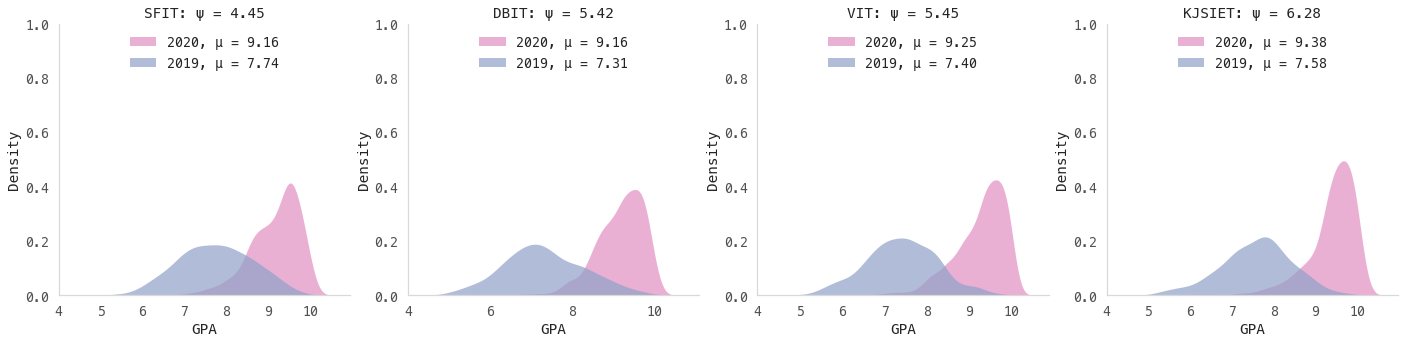

In [71]:
fig = plt.figure(figsize=(24,5))
for i,c in enumerate([531, 688, 534, 691], 1):
    plt.subplot(1,4,i)
    plot_single_college(c)

In [72]:
fig.savefig("./images/Handpicked.png")